In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

pd.set_option('display.max_columns', None)

In [30]:
df = pd.read_csv('movie_variable_full.csv')
df.head()

,id,tconst,titleType,primaryTitle,originalTitle,startYear,release_date,isAdult,genres,runtime,budget,original_language,overview,popularity,poster_path,production_companies,production_countries,revenue,status,vote_average,vote_count,averageRating,numVotes,director,actor
0,16612,tt0000001,short,Carmencita,Carmencita,1894.0,1894-03-14,0,"Documentary,Short",1.0,0,en,The first woman to appear in front of an Ediso...,1.273072,/6QJowxF4f2hrUtmrDXOqbRDMdDH.jpg,Edison Manufacturing Company,US,0.0,Released,4.9,18.0,5.6,1550.0,William K.L. Dickson,Carmencita
1,88013,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,1892.0,1892-10-28,0,"Animation,Comedy,Romance",4.0,0,fr,"One night, Arlequin come to see his lover Colo...",0.673164,/yCJr2zZqEbWLggyqumVcXBFQABf.jpg,None,FR,0.0,Released,6.1,19.0,6.5,1207.0,Émile Reynaud,None
2,16624,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893.0,1893-05-08,0,"Comedy,Short",1.0,0,xx,Three men hammer on an anvil and pass a bottle...,1.061591,/6nh4gdZ4cWQbnXDicWIGsOZiZsx.jpg,Edison Manufacturing Company,US,0.0,Released,5.8,19.0,6.1,1934.0,William K.L. Dickson,Charles Kayser
3,105158,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,1894.0,1894-01-09,0,"Documentary,Short",1.0,0,en,A man (Thomas Edison's assistant) takes a pinc...,0.312246,/utsYe7NaVdiUhXpBwgln3LTucYs.jpg,Edison Manufacturing Company,US,0.0,Released,4.7,12.0,5.4,1667.0,William K.L. Dickson,Fred Ott
4,774,tt0000010,short,Exiting the Factory,La sortie de l'usine Lumière à Lyon,1895.0,1895-06-10,0,"Documentary,Short",1.0,0,fr,Working men and women leave the Lumière factor...,0.693917,/zwaMUm6cxmbMIUziIhkqyIoi2LO.jpg,Société Lumière,FR,0.0,Released,6.2,52.0,6.9,5545.0,Louis Lumière,None


In [5]:
df.shape

(45307, 25)

In [6]:
df.columns

Index(['id', 'tconst', 'titleType', 'primaryTitle', 'originalTitle',
       'startYear', 'release_date', 'isAdult', 'genres', 'runtime', 'budget',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'revenue', 'status',
       'vote_average', 'vote_count', 'averageRating', 'numVotes', 'director',
       'actor'],
      dtype='object')

In [9]:
df.describe()

,id,startYear,isAdult,runtime,budget,popularity,revenue,vote_average,vote_count,averageRating,numVotes
count,45307.000000,45307.000000,45307.000000,45307.000000,4.530700e+04,45307.000000,4.530700e+04,45307.000000,45307.000000,45307.000000,4.530700e+04
mean,107996.021983,1991.857748,0.000596,98.097115,4.235149e+06,2.927732,1.124325e+07,5.625003,110.222151,6.322242,1.613350e+04
std,112202.464454,24.002295,0.024405,35.340389,1.745001e+07,6.013227,6.443678e+07,1.914672,492.101919,1.144720,6.829993e+04
min,2.000000,1874.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.100000,5.000000e+00
25%,26380.500000,1978.000000,0.000000,87.000000,0.000000e+00,0.388835,0.000000e+00,5.000000,3.000000,5.700000,5.050000e+02
50%,59828.000000,2001.000000,0.000000,96.000000,0.000000e+00,1.130550,0.000000e+00,6.000000,10.000000,6.500000,1.470000e+03
75%,156332.000000,2010.000000,0.000000,108.000000,0.000000e+00,3.694370,0.000000e+00,6.800000,34.000000,7.100000,5.356000e+03
max,469172.000000,2019.000000,1.000000,1256.000000,3.800000e+08,547.488298,2.787965e+09,10.000000,14075.000000,9.500000,2.159745e+06


In [87]:
data = df[['titleType', 'startYear', 'release_date', 'isAdult', 'genres', 'runtime', 'budget',
       'original_language', 'popularity', 'production_companies', 'production_countries', 'revenue', 'status',
       'vote_average', 'vote_count', 'numVotes', 'director', 'actor', 'averageRating']].copy()

In [98]:
df_titletype = pd.get_dummies(data.titleType, prefix = 'type')
data = pd.concat([data,df_titletype],axis = 1)
data = data.drop('titleType',axis = 1)

In [99]:
data.startYear = data.startYear.astype(int)
data['startYear_pre2000'] = np.where(data['startYear'] < 2000,1,0)
data['startYear_2000_2010'] = np.where((data['startYear'] >= 2000) & (data['startYear'] < 2010), 1, 0)
data['startYear_post2010'] = np.where(data['startYear'] >= 2010,1,0)
data = data.drop('startYear',axis = 1)

In [100]:
data.release_date = pd.to_datetime(data.release_date)
data['release_month'] = data.release_date.dt.month
data['release_month'] = data['release_month'].astype(int)
data = data.drop('release_date',axis = 1)

In [101]:
genres_l = ['Action', 'Adult', 'Adventure', 'Animation', 
            'Biography', 'Comedy', 'Crime', 'Documentary', 
            'Drama', 'Family', 'Fantasy', 'Film-Noir', 
            'Foreign', 'History', 'Horror', 'Music', 'Musical', 
            'Mystery', 'News', 'Reality-TV', 'Romance', 
            'Sci-Fi', 'Short', 'Sport', 'TV Movie', 'Talk-Show', 
            'Thriller', 'War', 'Western']

df_genres = []
for i in data.genres:
    dic = dict()
    for j in i.split(','):
        dic[j] = 1
    df_genres.append(dic)

df_genres = pd.DataFrame(df_genres)
df_genres = df_genres[genres_l]
df_genres = df_genres.fillna(0)
df_genres = df_genres.astype(int)
df_genres.columns = ['genres_' + i for i in genres_l]

data = pd.concat([data,df_genres],axis = 1)
data = data.drop('genres',axis = 1)

In [102]:
def top_rank_category(d, x, rank, name):
    L = list(d[x].value_counts().keys())
    if 'None' in L:
        L.remove('None')
    L = L[:rank] + ['others']

    df_ = []
    for i in d[x]:
        dic = dict()
        if i in L:
            dic[i] = 1
        else:
            dic['others'] = 1
        df_.append(dic)

    df_ = pd.DataFrame(df_)
    df_ = df_.fillna(0)
    df_ = df_.astype(int)
    df_ = df_[L]
    df_.columns = [name + i for i in L]
    
    return df_

df_temp = top_rank_category(data, 'original_language', 8, 'language_')
data = pd.concat([data,df_temp],axis = 1)
data = data.drop('original_language',axis = 1)

df_temp = top_rank_category(data, 'production_companies', 5, 'company_')
data = pd.concat([data,df_temp],axis = 1)
data = data.drop('production_companies',axis = 1)

df_temp = top_rank_category(data, 'production_countries', 6, 'country_')
data = pd.concat([data,df_temp],axis = 1)
data = data.drop('production_countries',axis = 1)

df_temp = top_rank_category(data, 'director', 10, 'director_')
data = pd.concat([data,df_temp],axis = 1)
data = data.drop('director',axis = 1)

df_temp = top_rank_category(data, 'actor', 10, 'actor_')
data = pd.concat([data,df_temp],axis = 1)
data = data.drop('actor',axis = 1)

In [103]:
df_status = pd.get_dummies(data.status, prefix = 'status')
data = pd.concat([data,df_status],axis = 1)
data = data.drop(['status','status_None'],axis = 1)

In [104]:
data.head(1)

,isAdult,runtime,budget,popularity,revenue,vote_average,vote_count,numVotes,averageRating,type_movie,type_short,type_tvEpisode,type_tvMiniSeries,type_tvMovie,type_tvSeries,type_tvShort,type_tvSpecial,type_video,startYear_pre2000,startYear_2000_2010,startYear_post2010,release_month,genres_Action,genres_Adult,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Film-Noir,genres_Foreign,genres_History,genres_Horror,genres_Music,genres_Musical,genres_Mystery,genres_News,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_TV Movie,genres_Talk-Show,genres_Thriller,genres_War,genres_Western,language_en,language_fr,language_it,language_ja,language_de,language_es,language_ru,language_hi,language_others,company_Paramount Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Twentieth Century Fox Film Corporation,company_Warner Bros.,company_Universal Pictures,company_others,country_US,country_GB,country_FR,country_CA,country_JP,country_IT,country_others,director_John Ford,director_Michael Curtiz,director_Werner Herzog,director_Alfred Hitchcock,director_Woody Allen,director_Georges Méliès,director_Sidney Lumet,director_Jean-Luc Godard,director_Charlie Chaplin,director_Raoul Walsh,director_others,actor_John Wayne,actor_Jackie Chan,actor_Nicolas Cage,actor_Robert De Niro,actor_Gérard Depardieu,actor_Michael Caine,actor_Burt Lancaster,actor_Paul Newman,actor_Bruce Willis,actor_Barbara Stanwyck,actor_others,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored
0,0,1.0,0,1.273072,0.0,4.9,18.0,1550.0,5.6,0,1,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [105]:
data.describe()

,isAdult,runtime,budget,popularity,revenue,vote_average,vote_count,numVotes,averageRating,type_movie,type_short,type_tvEpisode,type_tvMiniSeries,type_tvMovie,type_tvSeries,type_tvShort,type_tvSpecial,type_video,startYear_pre2000,startYear_2000_2010,startYear_post2010,release_month,genres_Action,genres_Adult,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Film-Noir,genres_Foreign,genres_History,genres_Horror,genres_Music,genres_Musical,genres_Mystery,genres_News,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_TV Movie,genres_Talk-Show,genres_Thriller,genres_War,genres_Western,language_en,language_fr,language_it,language_ja,language_de,language_es,language_ru,language_hi,language_others,company_Paramount Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Twentieth Century Fox Film Corporation,company_Warner Bros.,company_Universal Pictures,company_others,country_US,country_GB,country_FR,country_CA,country_JP,country_IT,country_others,director_John Ford,director_Michael Curtiz,director_Werner Herzog,director_Alfred Hitchcock,director_Woody Allen,director_Georges Méliès,director_Sidney Lumet,director_Jean-Luc Godard,director_Charlie Chaplin,director_Raoul Walsh,director_others,actor_John Wayne,actor_Jackie Chan,actor_Nicolas Cage,actor_Robert De Niro,actor_Gérard Depardieu,actor_Michael Caine,actor_Burt Lancaster,actor_Paul Newman,actor_Bruce Willis,actor_Barbara Stanwyck,actor_others,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored
count,45307.000000,45307.000000,4.530700e+04,45307.000000,4.530700e+04,45307.000000,45307.000000,4.530700e+04,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000
mean,0.000596,98.097115,4.235149e+06,2.927732,1.124325e+07,5.625003,110.222151,1.613350e+04,6.322242,0.862494,0.029267,0.003355,0.007217,0.056724,0.001148,0.002053,0.008542,0.029201,0.471649,0.248240,0.280111,6.468559,0.142230,0.000464,0.101287,0.045799,0.051052,0.325910,0.135321,0.099344,0.501733,0.054804,0.053435,0.010616,0.000044,0.037875,0.100051,0.033107,0.020416,0.061933,0.002273,0.000066,0.152934,0.050323,0.022712,0.017128,0.000022,0.000088,0.117134,0.027854,0.018584,0.710133,0.053612,0.033637,0.029686,0.023705,0.021829,0.018143,0.011190,0.098064,0.021961,0.018783,0.017194,0.016686,0.016642,0.908734,0.405809,0.067605,0.059395,0.033019,0.032843,0.032379,0.368950,0.001457,0.001413,0.001192,0.001170,0.001082,0.001082,0.001015,0.000993,0.000971,0.000949,0.988677,0.002075,0.001611,0.001324,0.001236,0.001148,0.001104,0.001037,0.001037,0.001037,0.000993,0.987397,0.000022,0.000375,0.000265,0.002097,0.990487,0.004988
std,0.024405,35.340389,1.745001e+07,6.013227,6.443678e+07,1.914672,492.101919,6.829993e+04,1.144720,0.344385,0.1

In [106]:
data.to_csv('processed_data.csv',index = False)

# Combine text features

In [42]:
data = pd.read_csv('processed_data.csv')
overview = pd.read_csv('overview_bert_features.csv',index_col=0)
review = pd.read_csv('sentiment_score.csv',index_col=0)

In [47]:
data['id'] = df['id']
data['primaryTitle'] = df['primaryTitle']

data.set_index('id',inplace = True)
overview.set_index('id',inplace = True)
data = pd.concat([data,overview.iloc[:,:-1]],axis = 1)

data.set_index('primaryTitle',inplace = True)
review.set_index('primaryTitle',inplace = True)
data['sentiment_score'] = review['sentiment_score']
data.reset_index(inplace = True,drop=True)

data.dropna(inplace = True)
data.shape

(37200, 870)

In [48]:
data.head(1)

,isAdult,runtime,budget,popularity,revenue,vote_average,vote_count,numVotes,averageRating,type_movie,type_short,type_tvEpisode,type_tvMiniSeries,type_tvMovie,type_tvSeries,type_tvShort,type_tvSpecial,type_video,startYear_pre2000,startYear_2000_2010,startYear_post2010,release_month,genres_Action,genres_Adult,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Film-Noir,genres_Foreign,genres_History,genres_Horror,genres_Music,genres_Musical,genres_Mystery,genres_News,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_TV Movie,genres_Talk-Show,genres_Thriller,genres_War,genres_Western,language_en,language_fr,language_it,language_ja,language_de,language_es,language_ru,language_hi,language_others,company_Paramount Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Twentieth Century Fox Film Corporation,company_Warner Bros.,company_Universal Pictures,company_others,country_US,country_GB,country_FR,country_CA,country_JP,country_IT,country_others,director_John Ford,director_Michael Curtiz,director_Werner Herzog,director_Alfred Hitchcock,director_Woody Allen,director_Georges Méliès,director_Sidney Lumet,director_Jean-Luc Godard,director_Charlie Chaplin,director_Raoul Walsh,director_others,actor_John Wayne,actor_Jackie Chan,actor_Nicolas Cage,actor_Robert De Niro,actor_Gérard Depardieu,actor_Michael Caine,actor_Burt Lancaster,actor_Paul Newman,actor_Bruce Willis,actor_Barbara Stanwyck,actor_others,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,61

In [49]:
data.to_csv('processed_data_2.csv')

In [50]:
data = data.drop(['popularity','vote_average','vote_count','numVotes'],axis = 1)

In [51]:
def numerical_process(train, test):
    numerical = [['runtime','budget','revenue']]
    
    for i in numerical:
        mean =  train[i].mean()
        std = train[i].std()
        train[i] = (train[i] - mean) / std
        test[i] = (test[i] - mean) / std
        
    return train, test

In [52]:
# train_test_split
X = data.drop('averageRating',axis = 1)
y = data['averageRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape,y_train.shape

((29760, 865), (29760,))

In [53]:
X_train, X_test = numerical_process(X_train, X_test)

In [54]:
X_train.columns

Index(['isAdult', 'runtime', 'budget', 'revenue', 'type_movie', 'type_short',
       'type_tvEpisode', 'type_tvMiniSeries', 'type_tvMovie', 'type_tvSeries',
       ...
       '759', '760', '761', '762', '763', '764', '765', '766', '767',
       'sentiment_score'],
      dtype='object', length=865)

In [55]:
X_test.describe()

,isAdult,runtime,budget,revenue,type_movie,type_short,type_tvEpisode,type_tvMiniSeries,type_tvMovie,type_tvSeries,type_tvShort,type_tvSpecial,type_video,startYear_pre2000,startYear_2000_2010,startYear_post2010,release_month,genres_Action,genres_Adult,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Film-Noir,genres_Foreign,genres_History,genres_Horror,genres_Music,genres_Musical,genres_Mystery,genres_News,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_TV Movie,genres_Talk-Show,genres_Thriller,genres_War,genres_Western,language_en,language_fr,language_it,language_ja,language_de,language_es,language_ru,language_hi,language_others,company_Paramount Pictures,company_Metro-Goldwyn-Mayer (MGM),company_Twentieth Century Fox Film Corporation,company_Warner Bros.,company_Universal Pictures,company_others,country_US,country_GB,country_FR,country_CA,country_JP,country_IT,country_others,director_John Ford,director_Michael Curtiz,director_Werner Herzog,director_Alfred Hitchcock,director_Woody Allen,director_Georges Méliès,director_Sidney Lumet,director_Jean-Luc Godard,director_Charlie Chaplin,director_Raoul Walsh,director_others,actor_John Wayne,actor_Jackie Chan,actor_Nicolas Cage,actor_Robert De Niro,actor_Gérard Depardieu,actor_Michael Caine,actor_Burt Lancaster,actor_Paul Newman,actor_Bruce Willis,actor_Barbara Stanwyck,actor_others,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,

In [56]:
out_train = pd.concat([X_train,y_train],axis = 1)
out_train.to_csv('train_process_2.csv',index = False)
out_test = pd.concat([X_test,y_test],axis = 1)
out_test.to_csv('test_process_2.csv',index = False)

In [68]:
#out_train = pd.read_csv('train_process_2.csv')
#out_test = pd.read_csv('test_process_2.csv')
out_train.shape, out_test.shape

((29760, 866), (7440, 866))

In [154]:
X_train = out_train.drop(['averageRating'],axis = 1)
y_train = out_train['averageRating']
X_test = out_test.drop(['averageRating'],axis = 1)
y_test = out_test['averageRating']

In [151]:
# no text features
X_train = X_train.iloc[:,:96]
X_test = X_test.iloc[:,:96]

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Train MSE:', mean_squared_error(y_train,LR.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test,y_pred))

Train MSE: 0.8290216675025801
Test MSE: 0.8439489163060983


In [155]:
# add text features
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Train MSE:', mean_squared_error(y_train,LR.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test,y_pred))

Train MSE: 0.6883467358791729
Test MSE: 0.7424401419614992


In [60]:
# add text faetures
from mrmr import mrmr_classif
mrmr_rank = mrmr_classif(X_train,y_train,K = 50)
print(mrmr_rank)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:44<00:00,  3.28s/it]


['genres_Horror', 'type_tvSeries', '1', 'type_tvMiniSeries', 'type_tvEpisode', 'type_video', 'genres_Documentary', 'sentiment_score', 'genres_Adult', 'status_In Production', 'status_Canceled', '365', 'runtime', 'genres_Talk-Show', 'language_ru', '758', 'status_Planned', '331', 'genres_Drama', '206', 'genres_Thriller', 'genres_Sci-Fi', '514', 'language_en', '635', 'genres_Action', '302', '17', 'status_Post Production', '425', 'release_month', '149', 'language_others', '421', 'type_movie', '75', '464', '193', 'startYear_post2010', '238', 'director_Woody Allen', '184', '430', 'type_tvShort', '162', 'company_others', '40', '116', '129', 'director_Charlie Chaplin']


# MLP

In [82]:
class MLP(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim,hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim,1))


    def forward(self, x):
        '''Forward pass'''
        return self.layers(x).reshape(-1,)
  
  

batch_size = 16
epochs = 20

# Set fixed random number seed
torch.manual_seed(42)

# Prepare dataset
X_train_tensor = torch.tensor(X_train.values,dtype = torch.float)
y_train_tensor = torch.tensor(y_train.values,dtype = torch.float)
train = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=True)

X_test_tensor = torch.tensor(X_test.values,dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values,dtype = torch.float)
test = TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=True, drop_last=True)

In [83]:
# Initialize the MLP
mlp = MLP(input_dim = 96, hidden_dim = 64)
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters())

In [84]:
# Run the training loop
train_loss = []
test_loss = []
for epoch in range(epochs):

    running_loss = 0.0
    for batch_idx, (x, targets) in enumerate(train_dataloader):

        optimizer.zero_grad()
        pred = mlp(x)
        loss = loss_function(pred, targets)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    train_loss.append(running_loss/(batch_idx+1))
    print('epoch {:3d} | Train loss: {:.4f}'.format(epoch, running_loss/(batch_idx+1)))
    
    vrunning_loss = 0.0
    with torch.no_grad():
        for j, (vx,vtarget) in enumerate(test_dataloader, 0):

            vpred = mlp(vx)
            vloss = loss_function(vpred, vtarget)
            vrunning_loss += vloss.item()
            
    test_loss.append(vrunning_loss/(j+1))  
    print('epoch {:3d} | Test loss: {:.4f}'.format(epoch, vrunning_loss/(j+1)))

print('Finished Training')

epoch   0 | Train loss: 1.9892
epoch   0 | Test loss: 0.8493
epoch   1 | Train loss: 0.8207
epoch   1 | Test loss: 0.8057
epoch   2 | Train loss: 0.7882
epoch   2 | Test loss: 0.7996
epoch   3 | Train loss: 0.7661
epoch   3 | Test loss: 0.7720
epoch   4 | Train loss: 0.7496
epoch   4 | Test loss: 0.7615
epoch   5 | Train loss: 0.7405
epoch   5 | Test loss: 0.7652
epoch   6 | Train loss: 0.7280
epoch   6 | Test loss: 0.7955
epoch   7 | Train loss: 0.7195
epoch   7 | Test loss: 0.7679
epoch   8 | Train loss: 0.7157
epoch   8 | Test loss: 0.7807
epoch   9 | Train loss: 0.7079
epoch   9 | Test loss: 0.7512
epoch  10 | Train loss: 0.7028
epoch  10 | Test loss: 0.7332
epoch  11 | Train loss: 0.6989
epoch  11 | Test loss: 0.7371
epoch  12 | Train loss: 0.6967
epoch  12 | Test loss: 0.7347
epoch  13 | Train loss: 0.6881
epoch  13 | Test loss: 0.7420
epoch  14 | Train loss: 0.6921
epoch  14 | Test loss: 0.7486
epoch  15 | Train loss: 0.6862
epoch  15 | Test loss: 0.7453
epoch  16 | Train loss: 

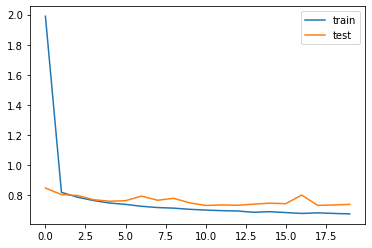

In [85]:
plt.plot(train_loss, label = 'train')
plt.plot(test_loss, label = 'test')
plt.legend()
plt.savefig('loss.png')
plt.show()

# Add text features

In [78]:
# Initialize the MLP
mlp = MLP(input_dim = 865, hidden_dim = 64)
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters())

In [79]:
# Run the training loop
train_loss = []
test_loss = []
for epoch in range(epochs):

    running_loss = 0.0
    for batch_idx, (x, targets) in enumerate(train_dataloader):

        optimizer.zero_grad()
        pred = mlp(x)
        loss = loss_function(pred, targets)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    train_loss.append(running_loss/(batch_idx+1))
    print('epoch {:3d} | Train loss: {:.4f}'.format(epoch, running_loss/(batch_idx+1)))
    
    vrunning_loss = 0.0
    with torch.no_grad():
        for j, (vx,vtarget) in enumerate(test_dataloader, 0):

            vpred = mlp(vx)
            vloss = loss_function(vpred, vtarget)
            vrunning_loss += vloss.item()
            
    test_loss.append(vrunning_loss/(j+1))  
    print('epoch {:3d} | Test loss: {:.4f}'.format(epoch, vrunning_loss/(j+1)))

print('Finished Training')

epoch   0 | Train loss: 1.0345
epoch   0 | Test loss: 0.8624
epoch   1 | Train loss: 0.7669
epoch   1 | Test loss: 0.7480
epoch   2 | Train loss: 0.7326
epoch   2 | Test loss: 0.7081
epoch   3 | Train loss: 0.7117
epoch   3 | Test loss: 0.8249
epoch   4 | Train loss: 0.6996
epoch   4 | Test loss: 0.6946
epoch   5 | Train loss: 0.6880
epoch   5 | Test loss: 0.7110
epoch   6 | Train loss: 0.6749
epoch   6 | Test loss: 0.6831
epoch   7 | Train loss: 0.6670
epoch   7 | Test loss: 0.6934
epoch   8 | Train loss: 0.6521
epoch   8 | Test loss: 0.6681
epoch   9 | Train loss: 0.6413
epoch   9 | Test loss: 0.6708
epoch  10 | Train loss: 0.6355
epoch  10 | Test loss: 0.6847
epoch  11 | Train loss: 0.6272
epoch  11 | Test loss: 0.6605
epoch  12 | Train loss: 0.6225
epoch  12 | Test loss: 0.6785
epoch  13 | Train loss: 0.6148
epoch  13 | Test loss: 0.6516
epoch  14 | Train loss: 0.6141
epoch  14 | Test loss: 0.6718
epoch  15 | Train loss: 0.6030
epoch  15 | Test loss: 0.6686
epoch  16 | Train loss: 

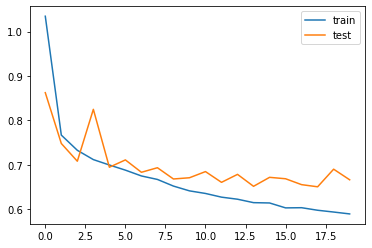

In [80]:
plt.plot(train_loss, label = 'train')
plt.plot(test_loss, label = 'test')
plt.legend()
plt.savefig('loss_2.png')
plt.show()

# Classification model

In [156]:
y_train = np.where(y_train >= 6.5, 1, 0)
y_test = np.where(y_test >= 6.5, 1, 0)

In [153]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Train Acc:', accuracy_score(y_train,LR.predict(X_train)))
print('Test Acc:', accuracy_score(y_test,y_pred))

Train Acc: 0.727486559139785
Test Acc: 0.7228494623655914


Test Accuracy: 0.7228 | Test TPR: 0.7206 | Test TNR: 0.7252 | Test AUC: 0.7229


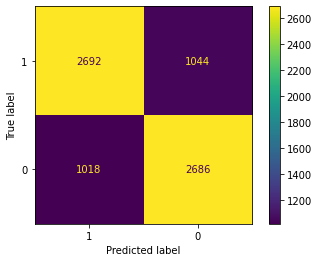

In [130]:
cm = confusion_matrix(y_test,y_pred, labels=[1, 0])
TP = cm[0][0] # True Positives                                                                                          
FN = cm[0][1] # False Positives                                                                                          
FP = cm[1][0] # True Negatives                                                                                          
TN = cm[1][1] # False Negatives  

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
Accuracy = accuracy_score(y_test,y_pred)
AUC = roc_auc_score(y_test,y_pred)

print('Test Accuracy: {:.4f} | Test TPR: {:.4f} | Test TNR: {:.4f} | Test AUC: {:.4f}'.format(Accuracy, TPR, TNR, AUC))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1, 0])
disp.plot()
plt.show()

In [143]:
class MLP(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim,hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim,1),
            nn.Sigmoid())


    def forward(self, x):
        '''Forward pass'''
        return self.layers(x).reshape(-1,)
  
  

batch_size = 16
epochs = 5

# Set fixed random number seed
torch.manual_seed(42)

# Prepare dataset
X_train_tensor = torch.tensor(X_train.values,dtype = torch.float)
y_train_tensor = torch.tensor(y_train,dtype = torch.float)
train = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=True)

X_test_tensor = torch.tensor(X_test.values,dtype = torch.float)
y_test_tensor = torch.tensor(y_test,dtype = torch.float)
test = TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=True, drop_last=True)

In [144]:
# Initialize the MLP
mlp = MLP(input_dim = 96, hidden_dim = 64)
# Define the loss function and optimizer
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(mlp.parameters())

In [145]:
# Run the training loop
train_loss = []
test_loss = []
train_acc = []
test_acc = []
train_auc = []
test_auc = []
for epoch in range(epochs):

    running_loss = 0.0
    predss = torch.tensor([])  
    targetss = torch.tensor([])
    for batch_idx, (x, targets) in enumerate(train_dataloader):

        optimizer.zero_grad()
        pred = mlp(x)
        loss = loss_function(pred, targets)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        predss = torch.cat((predss,pred),0)
        targetss = torch.cat((targetss,targets),0)
        
    train_loss.append(running_loss/(batch_idx+1))
    
    ACC = accuracy_score(targetss.int().numpy(), torch.round(predss).int().numpy())
    train_acc.append(ACC)
    
    AUC = roc_auc_score(targetss.int().numpy(), torch.round(predss).int().numpy())
    train_auc.append(AUC)
    
    print('epoch {:3d} | Train loss: {:.4f} | Train Acc: {:.4f} | Train Auc: {:.4f}'.format(epoch, running_loss/(batch_idx+1), ACC, AUC))
    
    vrunning_loss = 0.0
    vpredss = torch.tensor([])  
    vtargetss = torch.tensor([])
    with torch.no_grad():
        for j, (vx,vtarget) in enumerate(test_dataloader, 0):

            vpred = mlp(vx)
            vloss = loss_function(vpred, vtarget)
            vrunning_loss += vloss.item()
            
            vpredss = torch.cat((vpredss,vpred),0)
            vtargetss = torch.cat((vtargetss,vtarget),0)
            
    test_loss.append(vrunning_loss/(j+1))  
    
    ACC = accuracy_score(vtargetss.int().numpy(), torch.round(vpredss).int().numpy())
    test_acc.append(ACC)
    
    AUC = roc_auc_score(vtargetss.int().numpy(), torch.round(vpredss).int().numpy())
    test_auc.append(AUC)
    
    print('epoch {:3d} | Test loss: {:.4f} | Test Acc: {:.4f} | Test Auc: {:.4f}'.format(epoch, vrunning_loss/(j+1), ACC, AUC))

print('Finished Training')

epoch   0 | Train loss: 0.5574 | Train Acc: 0.7099 | Train Auc: 0.7097
epoch   0 | Test loss: 0.5377 | Test Acc: 0.7247 | Test Auc: 0.7246
epoch   1 | Train loss: 0.5304 | Train Acc: 0.7308 | Train Auc: 0.7306
epoch   1 | Test loss: 0.5293 | Test Acc: 0.7321 | Test Auc: 0.7321
epoch   2 | Train loss: 0.5234 | Train Acc: 0.7357 | Train Auc: 0.7355
epoch   2 | Test loss: 0.5239 | Test Acc: 0.7315 | Test Auc: 0.7313
epoch   3 | Train loss: 0.5181 | Train Acc: 0.7394 | Train Auc: 0.7392
epoch   3 | Test loss: 0.5226 | Test Acc: 0.7309 | Test Auc: 0.7307
epoch   4 | Train loss: 0.5131 | Train Acc: 0.7438 | Train Auc: 0.7436
epoch   4 | Test loss: 0.5219 | Test Acc: 0.7347 | Test Auc: 0.7349
Finished Training


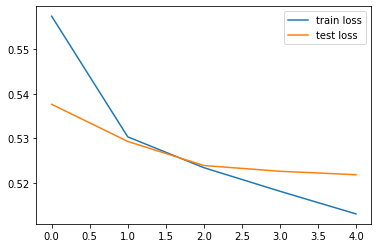

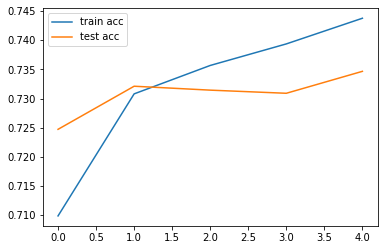

In [146]:
plt.plot(train_loss, label = 'train loss')
plt.plot(test_loss, label = 'test loss')
plt.legend()
plt.savefig('loss_classification.png')
plt.show()

plt.plot(train_acc, label = 'train acc')
plt.plot(test_acc, label = 'test acc')
plt.legend()
plt.savefig('acc_classification.png')
plt.show()

Test Accuracy: 0.7347 | Test TPR: 0.6876 | Test TNR: 0.7821 | Test AUC: 0.7349


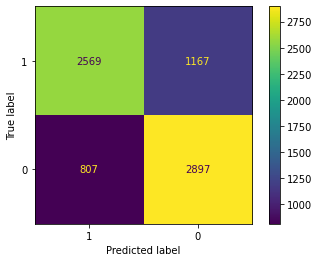

In [147]:
cm = confusion_matrix(vtargetss.int().numpy(), torch.round(vpredss).int().numpy(), labels=[1, 0])
TP = cm[0][0] # True Positives                                                                                          
FN = cm[0][1] # False Positives                                                                                          
FP = cm[1][0] # True Negatives                                                                                          
TN = cm[1][1] # False Negatives  

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
Accuracy = accuracy_score(vtargetss.int().numpy(), torch.round(vpredss).int().numpy())
AUC = roc_auc_score(vtargetss.int().numpy(), torch.round(vpredss).int().numpy())

print('Test Accuracy: {:.4f} | Test TPR: {:.4f} | Test TNR: {:.4f} | Test AUC: {:.4f}'.format(Accuracy, TPR, TNR, AUC))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1, 0])
disp.plot()
plt.show()

# Add text features

In [157]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Train Acc:', accuracy_score(y_train,LR.predict(X_train)))
print('Test Acc:', accuracy_score(y_test,y_pred))

Train Acc: 0.7554099462365591
Test Acc: 0.740994623655914


Test Accuracy: 0.7410 | Test TPR: 0.7404 | Test TNR: 0.7416 | Test AUC: 0.7410


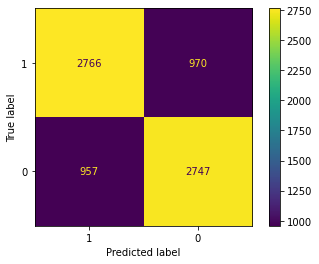

In [134]:
cm = confusion_matrix(y_test,y_pred, labels=[1, 0])
TP = cm[0][0] # True Positives                                                                                          
FN = cm[0][1] # False Positives                                                                                          
FP = cm[1][0] # True Negatives                                                                                          
TN = cm[1][1] # False Negatives  

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
Accuracy = accuracy_score(y_test,y_pred)
AUC = roc_auc_score(y_test,y_pred)

print('Test Accuracy: {:.4f} | Test TPR: {:.4f} | Test TNR: {:.4f} | Test AUC: {:.4f}'.format(Accuracy, TPR, TNR, AUC))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1, 0])
disp.plot()
plt.show()

In [136]:
# Initialize the MLP
mlp = MLP(input_dim = 865, hidden_dim = 64)
# Define the loss function and optimizer
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(mlp.parameters())

In [137]:
# Run the training loop
train_loss = []
test_loss = []
train_acc = []
test_acc = []
train_auc = []
test_auc = []
for epoch in range(epochs):

    running_loss = 0.0
    predss = torch.tensor([])  
    targetss = torch.tensor([])
    for batch_idx, (x, targets) in enumerate(train_dataloader):

        optimizer.zero_grad()
        pred = mlp(x)
        loss = loss_function(pred, targets)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        predss = torch.cat((predss,pred),0)
        targetss = torch.cat((targetss,targets),0)
        
    train_loss.append(running_loss/(batch_idx+1))
    
    ACC = accuracy_score(targetss.int().numpy(), torch.round(predss).int().numpy())
    train_acc.append(ACC)
    
    AUC = roc_auc_score(targetss.int().numpy(), torch.round(predss).int().numpy())
    train_auc.append(AUC)
    
    print('epoch {:3d} | Train loss: {:.4f} | Train Acc: {:.4f} | Train Auc: {:.4f}'.format(epoch, running_loss/(batch_idx+1), ACC, AUC))
    
    vrunning_loss = 0.0
    vpredss = torch.tensor([])  
    vtargetss = torch.tensor([])
    with torch.no_grad():
        for j, (vx,vtarget) in enumerate(test_dataloader, 0):

            vpred = mlp(vx)
            vloss = loss_function(vpred, vtarget)
            vrunning_loss += vloss.item()
            
            vpredss = torch.cat((vpredss,vpred),0)
            vtargetss = torch.cat((vtargetss,vtarget),0)
            
    test_loss.append(vrunning_loss/(j+1))  
    
    ACC = accuracy_score(vtargetss.int().numpy(), torch.round(vpredss).int().numpy())
    test_acc.append(ACC)
    
    AUC = roc_auc_score(vtargetss.int().numpy(), torch.round(vpredss).int().numpy())
    test_auc.append(AUC)
    
    print('epoch {:3d} | Test loss: {:.4f} | Test Acc: {:.4f} | Test Auc: {:.4f}'.format(epoch, vrunning_loss/(j+1), ACC, AUC))

print('Finished Training')

epoch   0 | Train loss: 0.5555 | Train Acc: 0.7108 | Train Auc: 0.7105
epoch   0 | Test loss: 0.5217 | Test Acc: 0.7387 | Test Auc: 0.7389
epoch   1 | Train loss: 0.5190 | Train Acc: 0.7366 | Train Auc: 0.7363
epoch   1 | Test loss: 0.5080 | Test Acc: 0.7491 | Test Auc: 0.7489
epoch   2 | Train loss: 0.5074 | Train Acc: 0.7464 | Train Auc: 0.7461
epoch   2 | Test loss: 0.5037 | Test Acc: 0.7454 | Test Auc: 0.7454
epoch   3 | Train loss: 0.4997 | Train Acc: 0.7507 | Train Auc: 0.7503
epoch   3 | Test loss: 0.4987 | Test Acc: 0.7559 | Test Auc: 0.7558
epoch   4 | Train loss: 0.4936 | Train Acc: 0.7562 | Train Auc: 0.7559
epoch   4 | Test loss: 0.4971 | Test Acc: 0.7531 | Test Auc: 0.7531
Finished Training


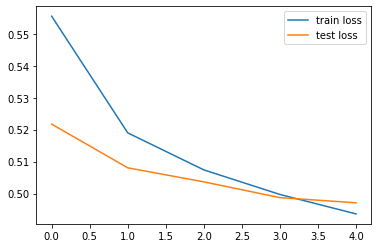

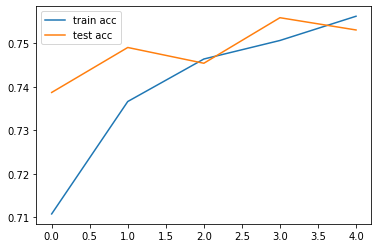

In [138]:
plt.plot(train_loss, label = 'train loss')
plt.plot(test_loss, label = 'test loss')
plt.legend()
plt.savefig('loss_classification_2.png')
plt.show()

plt.plot(train_acc, label = 'train acc')
plt.plot(test_acc, label = 'test acc')
plt.legend()
plt.savefig('acc_classification_2.png')
plt.show()

Test Accuracy: 0.7531 | Test TPR: 0.7546 | Test TNR: 0.7516 | Test AUC: 0.7531


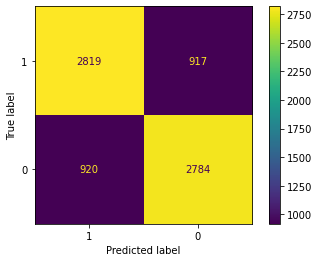

In [139]:
cm = confusion_matrix(vtargetss.int().numpy(), torch.round(vpredss).int().numpy(), labels=[1, 0])
TP = cm[0][0] # True Positives                                                                                          
FN = cm[0][1] # False Positives                                                                                          
FP = cm[1][0] # True Negatives                                                                                          
TN = cm[1][1] # False Negatives  

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
Accuracy = accuracy_score(vtargetss.int().numpy(), torch.round(vpredss).int().numpy())
AUC = roc_auc_score(vtargetss.int().numpy(), torch.round(vpredss).int().numpy())

print('Test Accuracy: {:.4f} | Test TPR: {:.4f} | Test TNR: {:.4f} | Test AUC: {:.4f}'.format(Accuracy, TPR, TNR, AUC))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1, 0])
disp.plot()
plt.show()